In [1]:
import requests
import json
import pandas as pd
import numpy as np
from datetime import datetime
import sys
print(sys.version)

3.12.8 (main, Jul  3 2025, 14:08:45) [Clang 16.0.0 (clang-1600.0.26.3)]


In [2]:
sys.path.append('../')
import src.api.espn as espn
import src.data.reader_weekly_offdef as weekly_reader
import src.data.reader_weekly_results as weekly_results_reader
import src.analytics.game_team_stats as game_team_stats
import src.analytics.collinearity as collinearity

### sample offensive data

Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week06/def.csv
Analyzing def data for 2022 week 6
Data shape: (32, 30)
Normalized: False
--------------------------------------------------


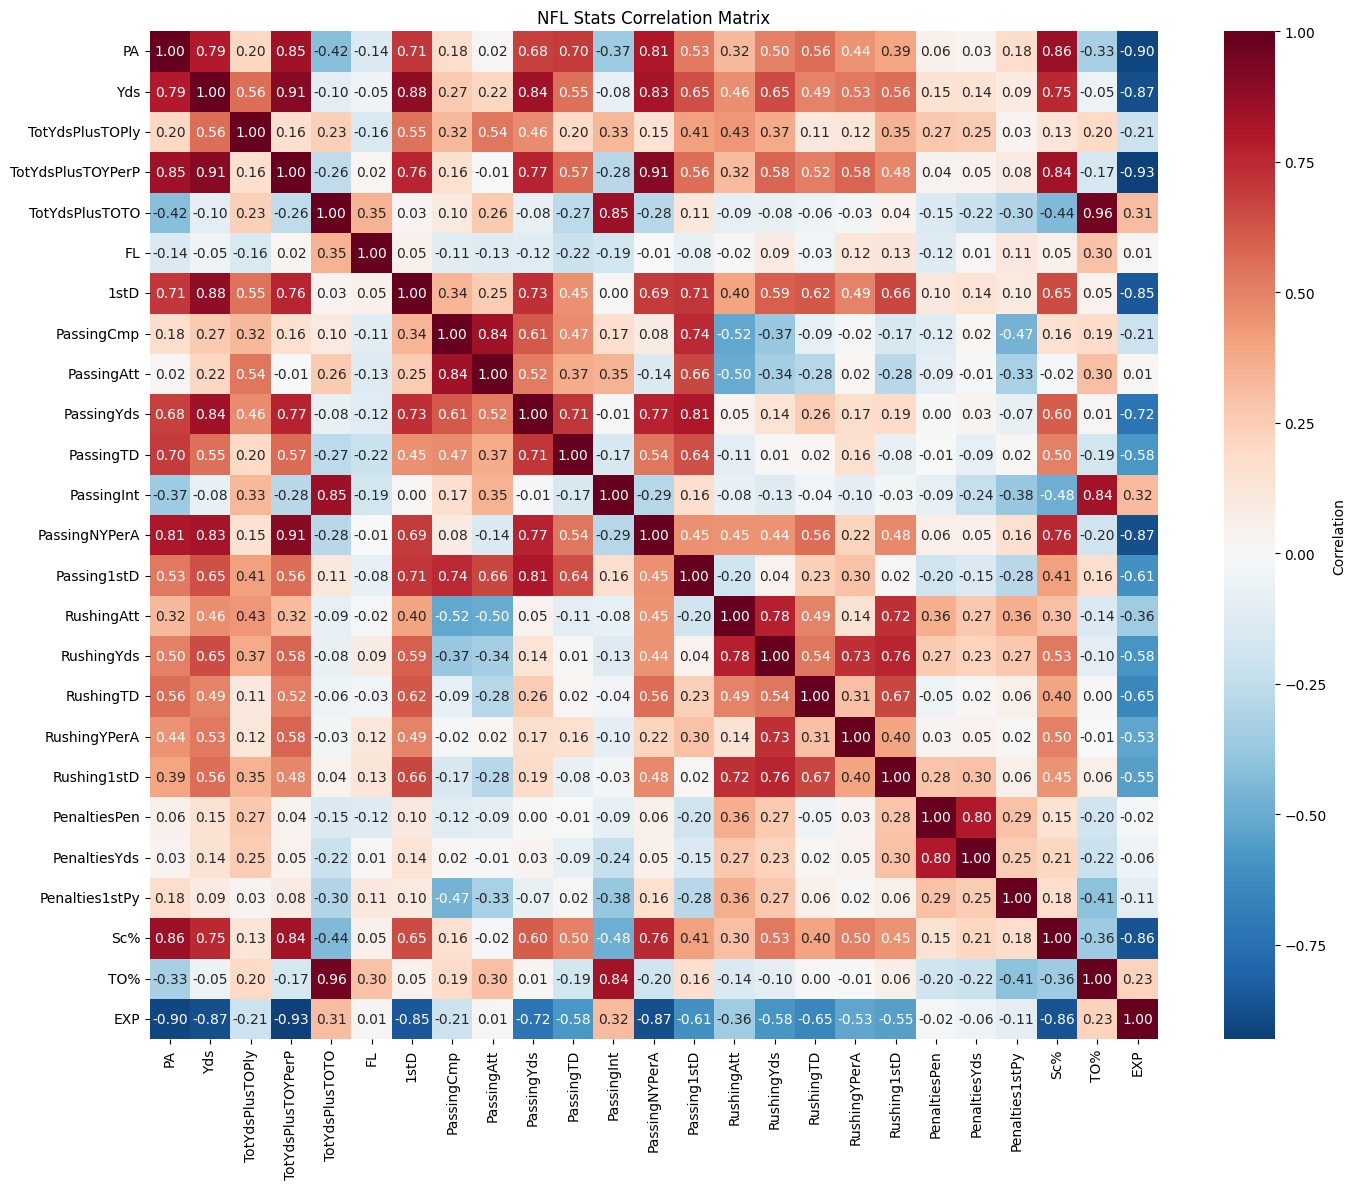

High correlation pairs (|r| > 0.8):
  PA ↔ TotYdsPlusTOYPerP: 0.846
  PA ↔ PassingNYPerA: 0.805
  PA ↔ Sc%: 0.861
  PA ↔ EXP: -0.902
  Yds ↔ TotYdsPlusTOYPerP: 0.907
  Yds ↔ 1stD: 0.881
  Yds ↔ PassingYds: 0.843
  Yds ↔ PassingNYPerA: 0.830
  Yds ↔ EXP: -0.872
  TotYdsPlusTOYPerP ↔ PassingNYPerA: 0.907
  TotYdsPlusTOYPerP ↔ Sc%: 0.839
  TotYdsPlusTOYPerP ↔ EXP: -0.931
  TotYdsPlusTOTO ↔ PassingInt: 0.855
  TotYdsPlusTOTO ↔ TO%: 0.957
  1stD ↔ EXP: -0.848
  PassingCmp ↔ PassingAtt: 0.842
  PassingYds ↔ Passing1stD: 0.809
  PassingInt ↔ TO%: 0.839
  PassingNYPerA ↔ EXP: -0.872
  Sc% ↔ EXP: -0.856
PA
Yds
TotYdsPlusTOPly
TotYdsPlusTOYPerP
TotYdsPlusTOTO
FL
1stD
PassingCmp
PassingAtt
PassingYds
PassingTD
PassingInt
PassingNYPerA
Passing1stD
RushingAtt
RushingYds
RushingTD
RushingYPerA
Rushing1stD
PenaltiesPen
PenaltiesYds
Penalties1stPy
Sc%
TO%
EXP
Variance Inflation Factors:
             Variable           VIF
9          PassingYds           inf
1                 Yds           inf
4      T

/Users/tj/.pyenv/versions/nfl/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [13]:
results = collinearity.full_multicollinearity_analysis(
    year=2022,
    week=6,
    file_type='def', 
    normalize=False)

Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week06/def.csv
Analyzing def data for 2022 week 6
Data shape: (32, 30)
Normalized: True
--------------------------------------------------


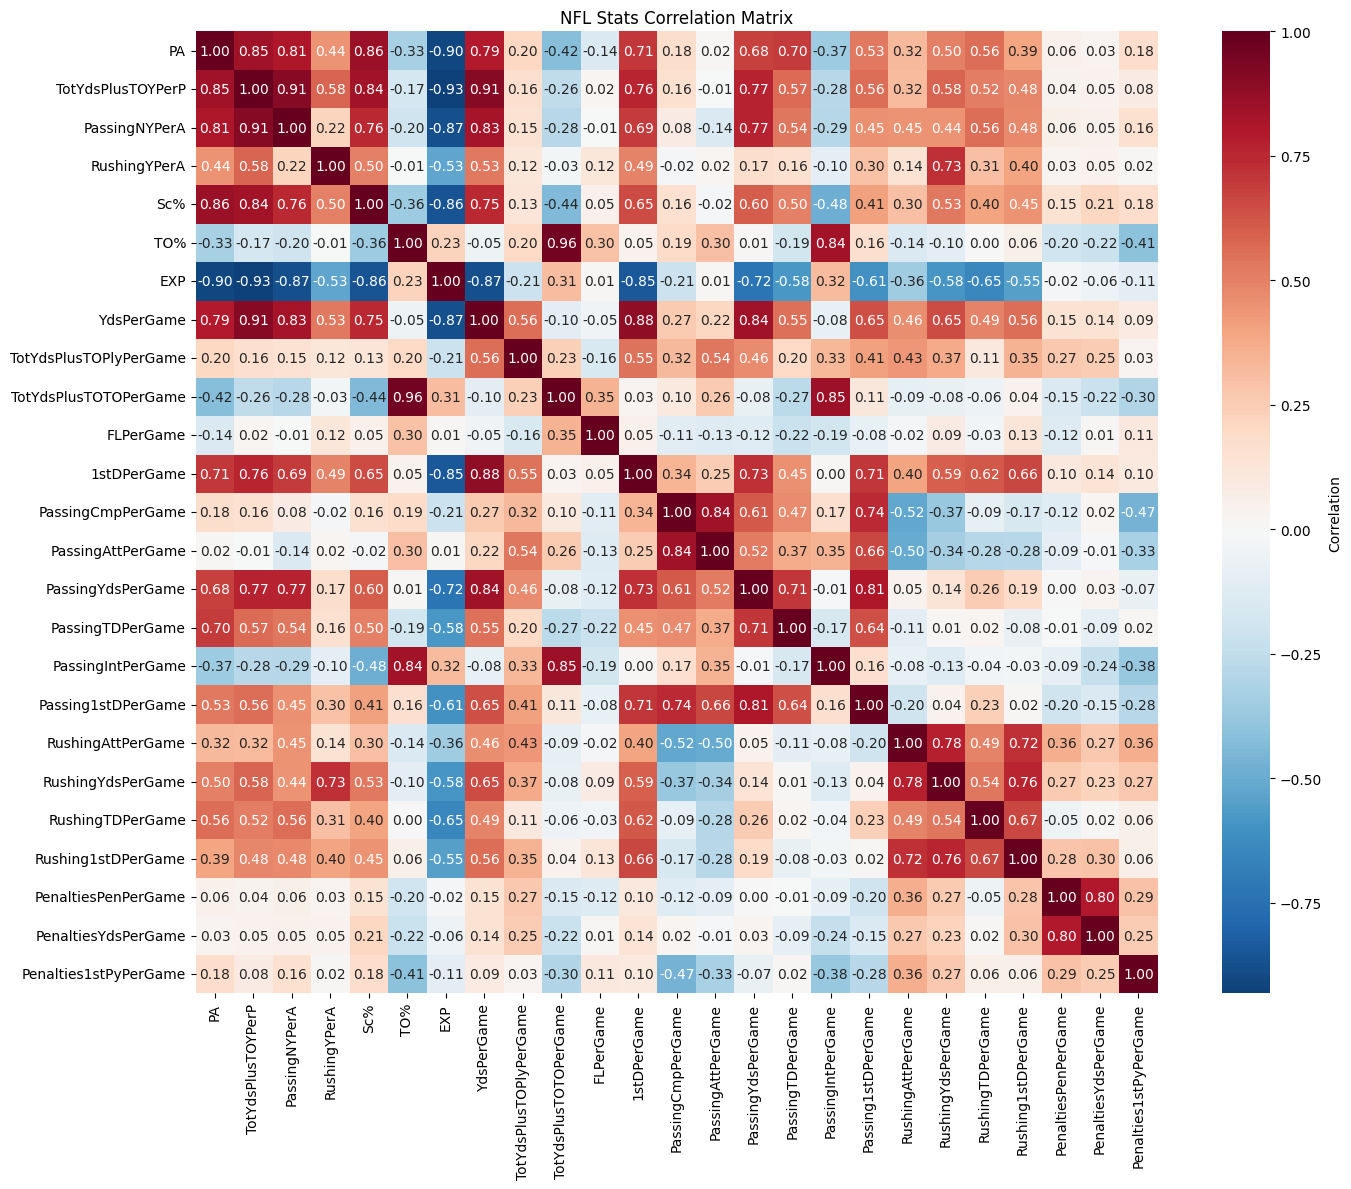

High correlation pairs (|r| > 0.8):
  PA ↔ TotYdsPlusTOYPerP: 0.846
  PA ↔ PassingNYPerA: 0.805
  PA ↔ Sc%: 0.861
  PA ↔ EXP: -0.902
  TotYdsPlusTOYPerP ↔ PassingNYPerA: 0.907
  TotYdsPlusTOYPerP ↔ Sc%: 0.839
  TotYdsPlusTOYPerP ↔ EXP: -0.931
  TotYdsPlusTOYPerP ↔ YdsPerGame: 0.907
  PassingNYPerA ↔ EXP: -0.872
  PassingNYPerA ↔ YdsPerGame: 0.830
  Sc% ↔ EXP: -0.856
  TO% ↔ TotYdsPlusTOTOPerGame: 0.957
  TO% ↔ PassingIntPerGame: 0.839
  EXP ↔ YdsPerGame: -0.872
  EXP ↔ 1stDPerGame: -0.848
  YdsPerGame ↔ 1stDPerGame: 0.881
  YdsPerGame ↔ PassingYdsPerGame: 0.843
  TotYdsPlusTOTOPerGame ↔ PassingIntPerGame: 0.855
  PassingCmpPerGame ↔ PassingAttPerGame: 0.842
  PassingYdsPerGame ↔ Passing1stDPerGame: 0.809
Variance Inflation Factors:
                  Variable           VIF
24   Penalties1stPyPerGame           inf
16       PassingIntPerGame           inf
21      Rushing1stDPerGame           inf
19       RushingYdsPerGame           inf
7               YdsPerGame           inf
9    TotYdsP

/Users/tj/.pyenv/versions/nfl/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [3]:
results = collinearity.full_multicollinearity_analysis(
    year=2022,
    week=6,
    file_type='def', 
    normalize=True)

### sample offensive data

Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week06/off.csv
Analyzing off data for 2022 week 6
Data shape: (32, 30)
Normalized: False
--------------------------------------------------


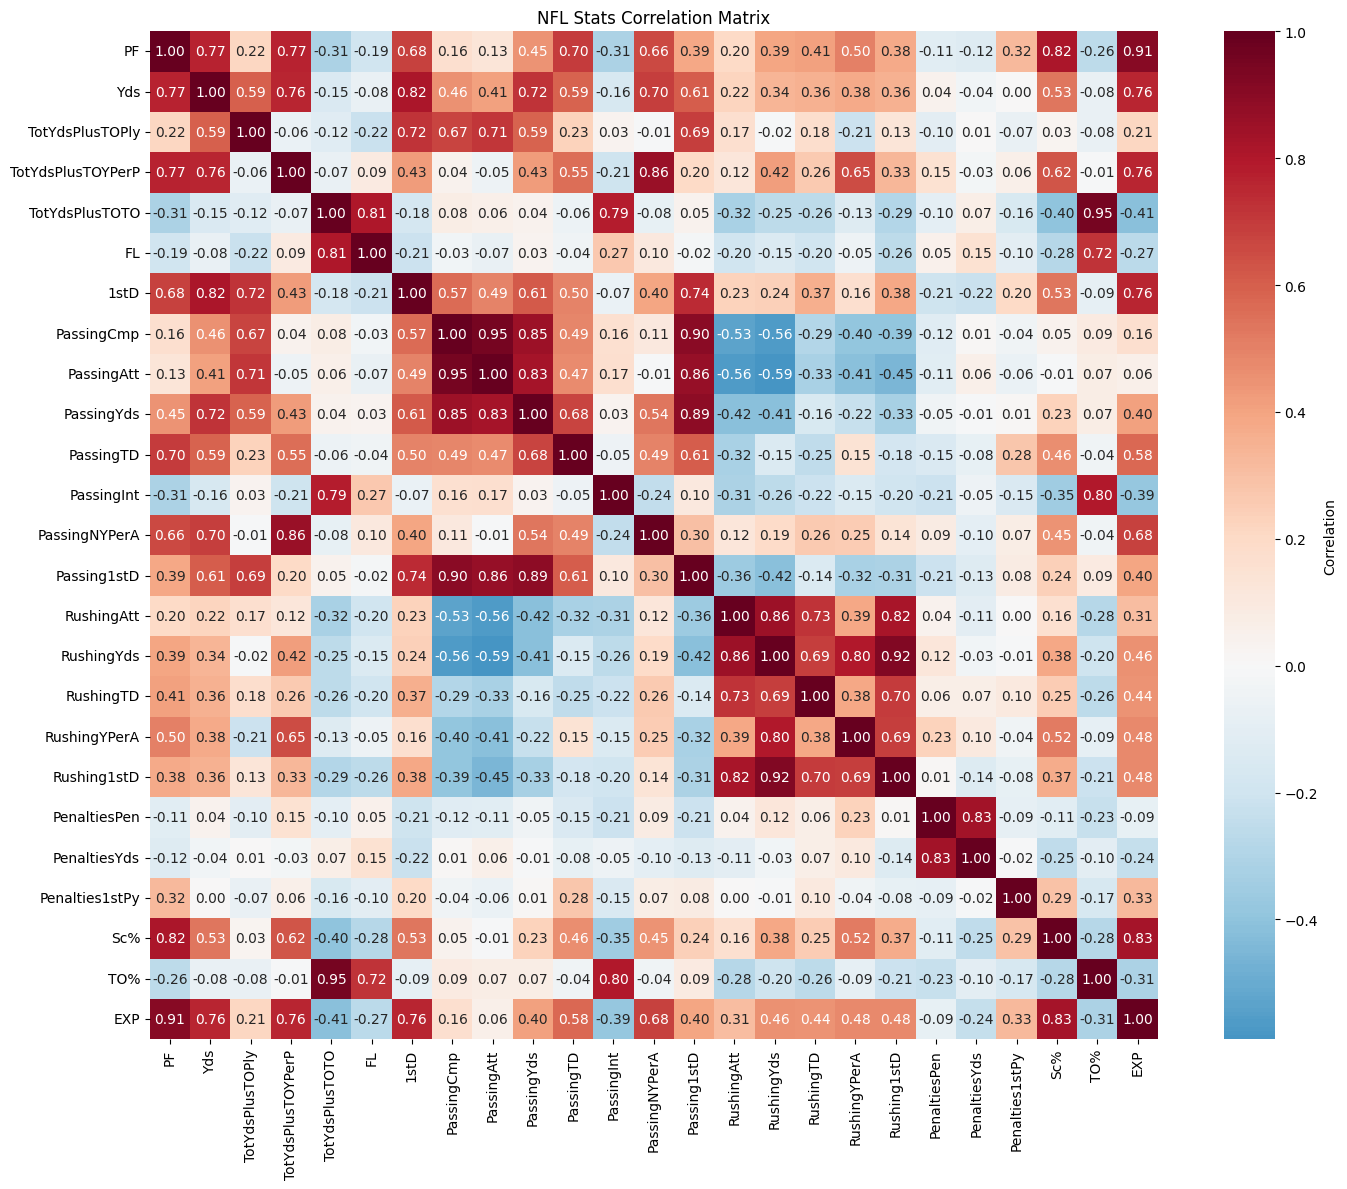

High correlation pairs (|r| > 0.8):
  PF ↔ Sc%: 0.817
  PF ↔ EXP: 0.905
  Yds ↔ 1stD: 0.817
  TotYdsPlusTOYPerP ↔ PassingNYPerA: 0.861
  TotYdsPlusTOTO ↔ FL: 0.807
  TotYdsPlusTOTO ↔ TO%: 0.950
  PassingCmp ↔ PassingAtt: 0.953
  PassingCmp ↔ PassingYds: 0.855
  PassingCmp ↔ Passing1stD: 0.898
  PassingAtt ↔ PassingYds: 0.828
  PassingAtt ↔ Passing1stD: 0.864
  PassingYds ↔ Passing1stD: 0.893
  PassingInt ↔ TO%: 0.801
  RushingAtt ↔ RushingYds: 0.855
  RushingAtt ↔ Rushing1stD: 0.824
  RushingYds ↔ RushingYPerA: 0.801
  RushingYds ↔ Rushing1stD: 0.919
  PenaltiesPen ↔ PenaltiesYds: 0.833
  Sc% ↔ EXP: 0.830
Variance Inflation Factors:
             Variable           VIF
4      TotYdsPlusTOTO           inf
5                  FL           inf
6                1stD           inf
21     Penalties1stPy           inf
9          PassingYds           inf
18        Rushing1stD           inf
11         PassingInt           inf
1                 Yds           inf
13        Passing1stD           inf

/Users/tj/.pyenv/versions/nfl/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/tj/nfl/notebooks/../src/analytics/collinearity.py:100: RuntimeWarning: invalid value encountered in sqrt
  condition_indices = np.sqrt(max(eigenvalues) / eigenvalues)


In [5]:
season_results = collinearity.full_multicollinearity_analysis(
    year=2022,
    week=6,
    file_type='off',
    normalize=False 
)

Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week06/off.csv
Analyzing off data for 2022 week 6
Data shape: (32, 30)
Normalized: True
--------------------------------------------------


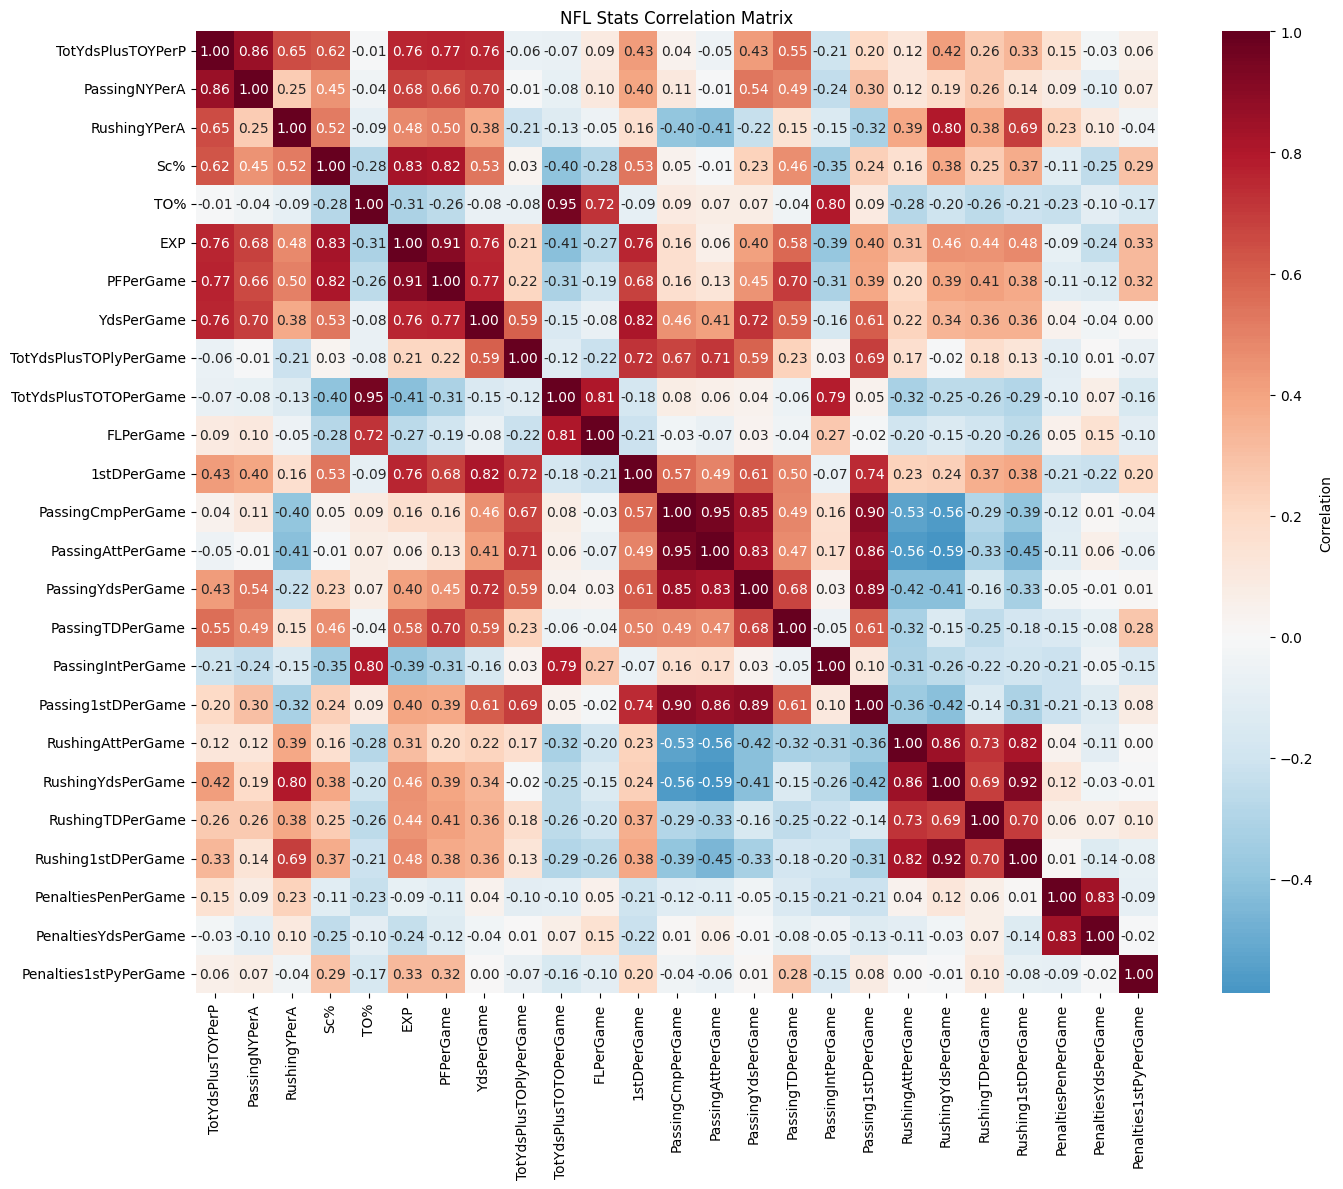

High correlation pairs (|r| > 0.8):
  TotYdsPlusTOYPerP ↔ PassingNYPerA: 0.861
  RushingYPerA ↔ RushingYdsPerGame: 0.801
  Sc% ↔ EXP: 0.830
  Sc% ↔ PFPerGame: 0.817
  TO% ↔ TotYdsPlusTOTOPerGame: 0.950
  TO% ↔ PassingIntPerGame: 0.801
  EXP ↔ PFPerGame: 0.905
  YdsPerGame ↔ 1stDPerGame: 0.817
  TotYdsPlusTOTOPerGame ↔ FLPerGame: 0.807
  PassingCmpPerGame ↔ PassingAttPerGame: 0.953
  PassingCmpPerGame ↔ PassingYdsPerGame: 0.855
  PassingCmpPerGame ↔ Passing1stDPerGame: 0.898
  PassingAttPerGame ↔ PassingYdsPerGame: 0.828
  PassingAttPerGame ↔ Passing1stDPerGame: 0.864
  PassingYdsPerGame ↔ Passing1stDPerGame: 0.893
  RushingAttPerGame ↔ RushingYdsPerGame: 0.855
  RushingAttPerGame ↔ Rushing1stDPerGame: 0.824
  RushingYdsPerGame ↔ Rushing1stDPerGame: 0.919
  PenaltiesPenPerGame ↔ PenaltiesYdsPerGame: 0.833
Variance Inflation Factors:
                  Variable           VIF
24   Penalties1stPyPerGame           inf
14       PassingYdsPerGame           inf
21      Rushing1stDPerGame       

/Users/tj/.pyenv/versions/nfl/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/tj/nfl/notebooks/../src/analytics/collinearity.py:100: RuntimeWarning: invalid value encountered in sqrt
  condition_indices = np.sqrt(max(eigenvalues) / eigenvalues)


In [6]:
season_results = collinearity.full_multicollinearity_analysis(
    year=2022,
    week=6,
    file_type='off',
    normalize=True 
)

In [7]:
if results:
    print(f"\n✓ Analysis completed!")
    print(f"  - Data shape: {results['data_info']['shape']}")
    print(f"  - High correlations found: {len(results['high_correlations'])}")


✓ Analysis completed!
  - Data shape: (32, 30)
  - High correlations found: 20


In [8]:
# Show top 3 high correlations
if results['high_correlations']:
    print("\n  Top correlations:")
    for i, pair in enumerate(results['high_correlations'][:3]):
        print(f"    {pair['var1']} ↔ {pair['var2']}: {pair['correlation']:.3f}")


  Top correlations:
    PA ↔ TotYdsPlusTOYPerP: 0.846
    PA ↔ PassingNYPerA: 0.805
    PA ↔ Sc%: 0.861


In [9]:
# Show variables with high VIF
if results['vif'] is not None:
    high_vif = results['vif'][results['vif']['VIF'] > 10]
    if not high_vif.empty:
        print(f"\n  High VIF variables (>10): {len(high_vif)}")
        for _, row in high_vif.head(3).iterrows():
            print(f"    {row['Variable']}: {row['VIF']:.2f}")


  High VIF variables (>10): 25
    Penalties1stPyPerGame: inf
    PassingIntPerGame: inf
    Rushing1stDPerGame: inf


### a whole year ... ?  not sure what this tells us ..

Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week03/off.csv
Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week04/off.csv
Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week05/off.csv
Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week06/off.csv
Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week07/off.csv
Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week08/off.csv
Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week09/off.csv
Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week10/off.csv
Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week11/off.csv
Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week13/off.csv
Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week14/off.csv
Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week15/off.csv
Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week16/off.csv
Processing CSV file: /Users/tj/nfl/notebooks/../dat

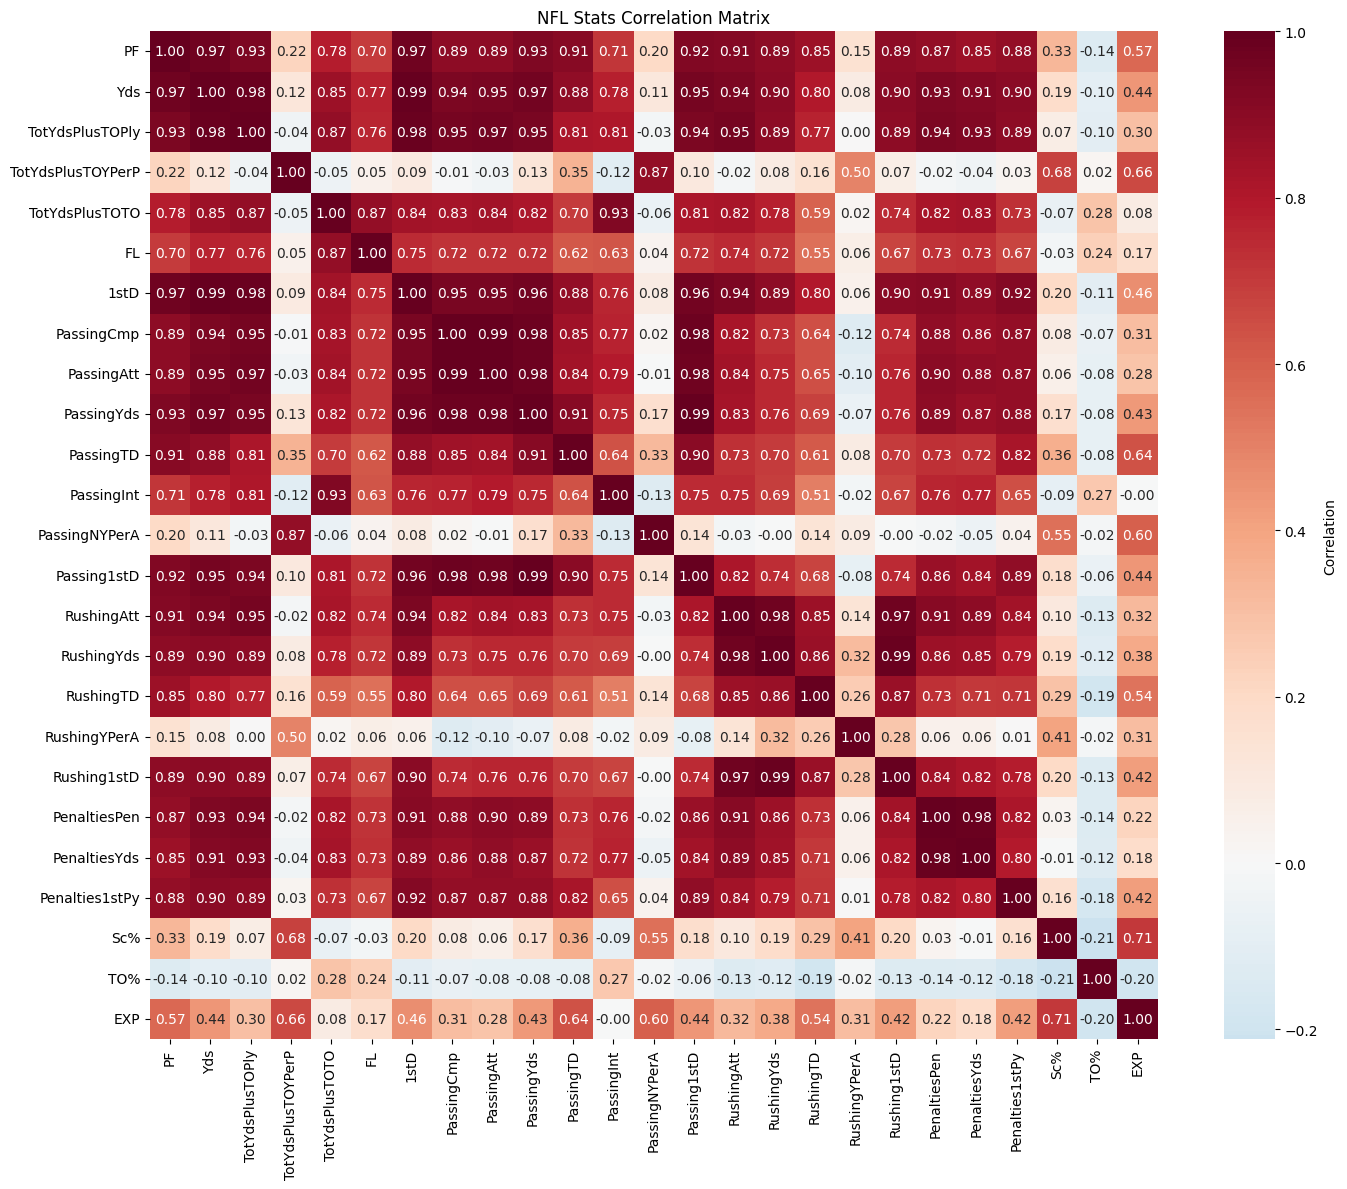

High correlation pairs (|r| > 0.8):
  PF ↔ Yds: 0.974
  PF ↔ TotYdsPlusTOPly: 0.934
  PF ↔ 1stD: 0.971
  PF ↔ PassingCmp: 0.888
  PF ↔ PassingAtt: 0.891
  PF ↔ PassingYds: 0.932
  PF ↔ PassingTD: 0.909
  PF ↔ Passing1stD: 0.922
  PF ↔ RushingAtt: 0.913
  PF ↔ RushingYds: 0.891
  PF ↔ RushingTD: 0.852
  PF ↔ Rushing1stD: 0.891
  PF ↔ PenaltiesPen: 0.874
  PF ↔ PenaltiesYds: 0.853
  PF ↔ Penalties1stPy: 0.881
  Yds ↔ TotYdsPlusTOPly: 0.983
  Yds ↔ TotYdsPlusTOTO: 0.853
  Yds ↔ 1stD: 0.993
  Yds ↔ PassingCmp: 0.941
  Yds ↔ PassingAtt: 0.950
  Yds ↔ PassingYds: 0.966
  Yds ↔ PassingTD: 0.882
  Yds ↔ Passing1stD: 0.954
  Yds ↔ RushingAtt: 0.941
  Yds ↔ RushingYds: 0.899
  Yds ↔ Rushing1stD: 0.896
  Yds ↔ PenaltiesPen: 0.930
  Yds ↔ PenaltiesYds: 0.912
  Yds ↔ Penalties1stPy: 0.898
  TotYdsPlusTOPly ↔ TotYdsPlusTOTO: 0.872
  TotYdsPlusTOPly ↔ 1stD: 0.982
  TotYdsPlusTOPly ↔ PassingCmp: 0.953
  TotYdsPlusTOPly ↔ PassingAtt: 0.966
  TotYdsPlusTOPly ↔ PassingYds: 0.946
  TotYdsPlusTOPly ↔ Passi

/Users/tj/.pyenv/versions/nfl/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [10]:
season_results = collinearity.seasonal_multicollinearity_analysis(
    year=2022,
    file_type='off',
    normalize=False 
)

Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week03/def.csv
Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week04/def.csv
Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week05/def.csv
Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week06/def.csv
Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week07/def.csv
Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week08/def.csv
Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week09/def.csv
Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week10/def.csv
Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week11/def.csv
Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week13/def.csv
Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week14/def.csv
Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week15/def.csv
Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week16/def.csv
Analyzing def data for entire 2022 season
Data shap

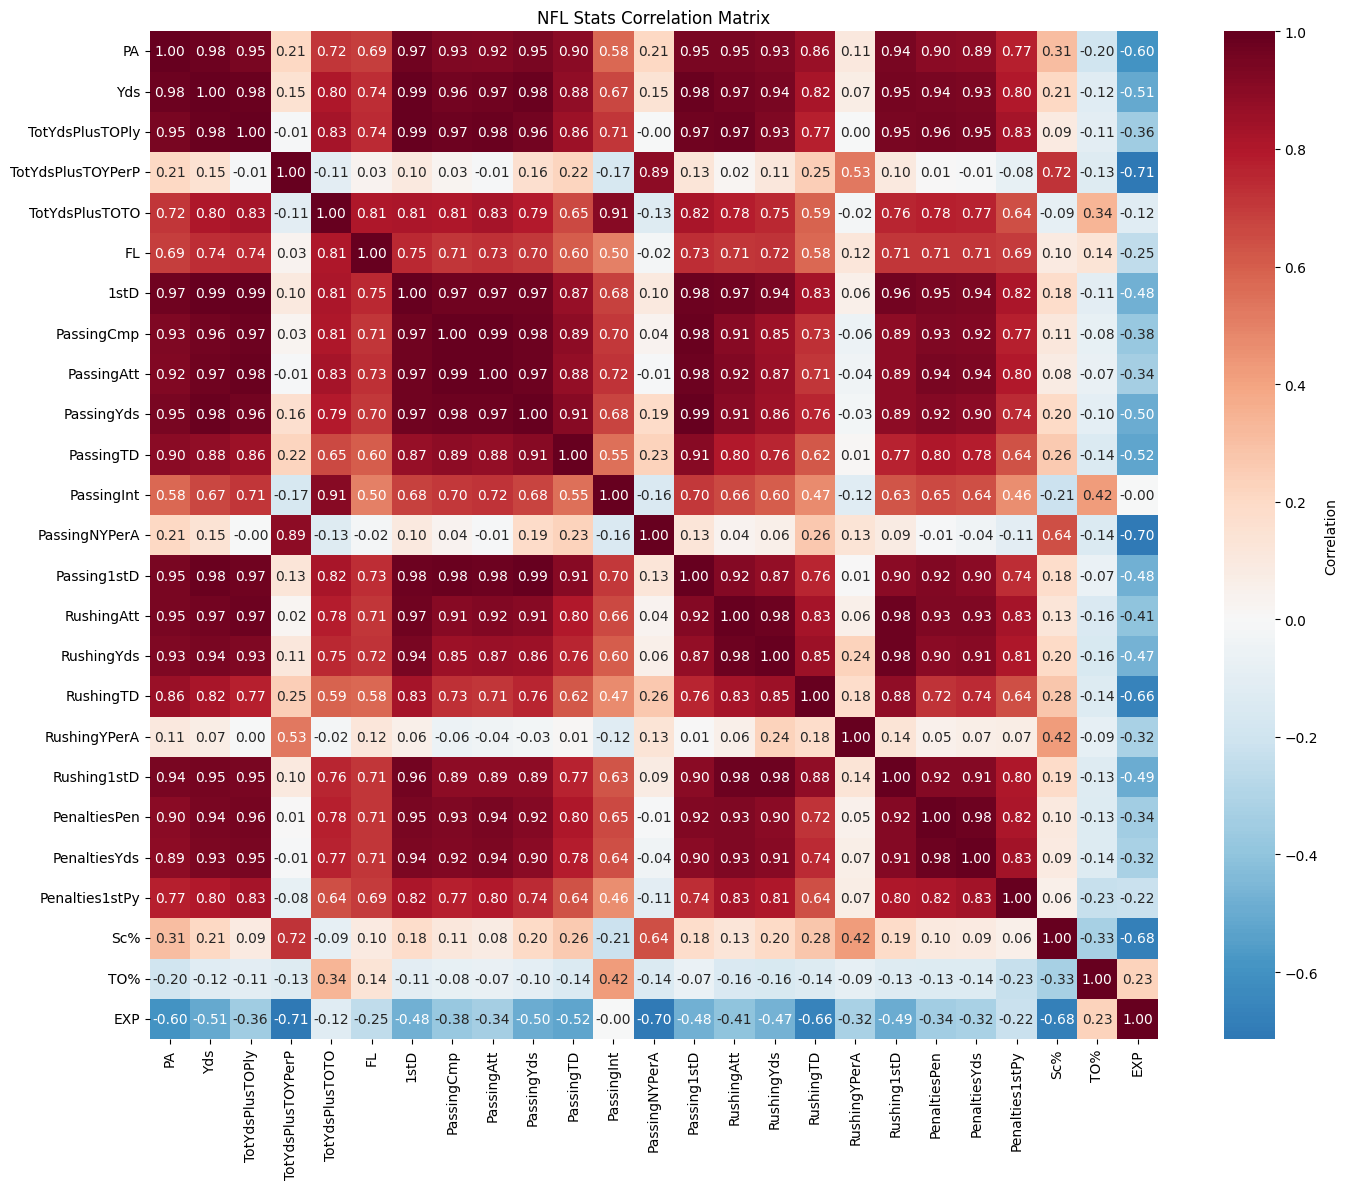

High correlation pairs (|r| > 0.8):
  PA ↔ Yds: 0.977
  PA ↔ TotYdsPlusTOPly: 0.948
  PA ↔ 1stD: 0.971
  PA ↔ PassingCmp: 0.929
  PA ↔ PassingAtt: 0.924
  PA ↔ PassingYds: 0.950
  PA ↔ PassingTD: 0.896
  PA ↔ Passing1stD: 0.950
  PA ↔ RushingAtt: 0.946
  PA ↔ RushingYds: 0.932
  PA ↔ RushingTD: 0.864
  PA ↔ Rushing1stD: 0.941
  PA ↔ PenaltiesPen: 0.896
  PA ↔ PenaltiesYds: 0.891
  Yds ↔ TotYdsPlusTOPly: 0.983
  Yds ↔ TotYdsPlusTOTO: 0.801
  Yds ↔ 1stD: 0.994
  Yds ↔ PassingCmp: 0.964
  Yds ↔ PassingAtt: 0.967
  Yds ↔ PassingYds: 0.981
  Yds ↔ PassingTD: 0.884
  Yds ↔ Passing1stD: 0.980
  Yds ↔ RushingAtt: 0.966
  Yds ↔ RushingYds: 0.941
  Yds ↔ RushingTD: 0.821
  Yds ↔ Rushing1stD: 0.954
  Yds ↔ PenaltiesPen: 0.944
  Yds ↔ PenaltiesYds: 0.935
  TotYdsPlusTOPly ↔ TotYdsPlusTOTO: 0.831
  TotYdsPlusTOPly ↔ 1stD: 0.988
  TotYdsPlusTOPly ↔ PassingCmp: 0.975
  TotYdsPlusTOPly ↔ PassingAtt: 0.984
  TotYdsPlusTOPly ↔ PassingYds: 0.960
  TotYdsPlusTOPly ↔ PassingTD: 0.855
  TotYdsPlusTOPly ↔ Pa

/Users/tj/.pyenv/versions/nfl/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/tj/nfl/notebooks/../src/analytics/collinearity.py:100: RuntimeWarning: invalid value encountered in sqrt
  condition_indices = np.sqrt(max(eigenvalues) / eigenvalues)


In [11]:
season_results = collinearity.seasonal_multicollinearity_analysis(
    year=2022,
    file_type='def',
    normalize=False 
)

In [12]:
print(f"\n✓ Season analysis completed!")
print(f"  - Data shape: {season_results['data_info']['shape']}")
print(f"  - High correlations: {len(season_results['high_correlations'])}")


✓ Season analysis completed!
  - Data shape: (416, 30)
  - High correlations: 109


In [13]:
# Show variable groups
print(f"  - Multicollinear groups: {len(season_results['variable_groups'])}")

# Show first group as example
first_group = list(season_results['variable_groups'].items())[0]
group_name, variables = first_group
print(f"    Example group '{group_name}': {variables[:3]}...")

  - Multicollinear groups: 4
    Example group 'PA_group': ['PassingCmp', 'PassingTD', 'TotYdsPlusTOPly']...
